In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

In [6]:
import html5lib

In [ ]:
# pd.read_html 함수 내에서 사용하는 패키지 설치
# !pip install html5lib

In [7]:
# html5lib : html 구문해석기

Type:        module
String form: <module 'html5lib' from 'D:\\kdt\\anaconda3\\Lib\\site-packages\\html5lib\\__init__.py'>
File:        d:\kdt\anaconda3\lib\site-packages\html5lib\__init__.py
Docstring:  
HTML parsing library based on the `WHATWG HTML specification
<https://whatwg.org/html>`_. The parser is designed to be compatible with
existing HTML found in the wild and implements well-defined error recovery that
is largely compatible with modern desktop web browsers.

Example usage::

    import html5lib
    with open("my_document.html", "rb") as f:
        tree = html5lib.parse(f)

For convenience, this module re-exports the following names:

* :func:`~.html5parser.parse`
* :func:`~.html5parser.parseFragment`
* :class:`~.html5parser.HTMLParser`
* :func:`~.treebuilders.getTreeBuilder`
* :func:`~.treewalkers.getTreeWalker`
* :func:`~.serializer.serialize`

In [4]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [29]:
pd.options.display.float_format = '{:,.2f}'.format

In [9]:
# 2차전지 테마주 네이버 증권 url
url = 'https://finance.naver.com/sise/sise_group_detail.naver?type=theme&no=64'

In [10]:
# 웹페이지 내에서 table 태그를 데이터프레임으로 변환해서 리스트에 개별요소로 저장
table = pd.read_html(url, encoding = 'cp949')
type(table)

D:\kdt\anaconda3\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


list

In [13]:
len(table)

3

In [11]:
table[0]

업종명    전일대비 전일대비 등락현황                  등락그래프
           업종명    전일대비        전체     상승   보합   하락 등락그래프
0          NaN     NaN       NaN    NaN  NaN  NaN   NaN
1  2차전지  테마 개요  +3.81%     138.0  133.0  0.0  5.0   29%
2          NaN     NaN       NaN    NaN  NaN  NaN   NaN
3          NaN     NaN       NaN    NaN  NaN  NaN   NaN

In [12]:
table[1]

,0,1,2,3,4,5
0,거래량,매수호가,거래대금(백만),시가총액(억),영업이익(억),PER(배)
1,시가,매도호가,전일거래량,자산총계(억),영업이익증가율,ROE(%)
2,고가,매수총잔량,외국인비율,부채총계(억),당기순이익(억),ROA(%)
3,저가,매도총잔량,상장주식수(천주),매출액(억),주당순이익(원),PBR(배)
4,NaN,NaN,NaN,매출액증가율,보통주배당금(원),유보율(%)


In [13]:
table[2]

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,신성델타테크 *,테마 편입 사유,96100.0,"상승 16,500",+20.73%,90500.0,90700.0,735695.0,67062.0,449486.0,NaN,NaN
2,에스코넥 *,테마 편입 사유,639.0,상승 93,+17.03%,564.0,565.0,598491.0,368.0,305612.0,NaN,NaN
3,파워로직스 *,테마 편입 사유,5980.0,상승 780,+15.00%,5690.0,5700.0,627353.0,3621.0,186155.0,NaN,NaN
4,신성에스티 *,테마 편입 사유,27350.0,"상승 3,450",+14.44%,25600.0,25700.0,112729.0,3011.0,42481.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,LG화학,테마 편입 사유,266000.0,"하락 2,000",-0.75%,267000.0,267500.0,54531.0,14579.0,436988.0,NaN,NaN
137,자이글 *,테마 편입 사유,5040.0,하락 80,-1.56%,5160.0,5170.0,44818.0,228.0,278272.0,NaN,NaN
138,고려아연,테마 편입 사유,1440000.0,"하락 92,000",-6.01%,1461000.0,1462000.0,15132.0,22136.0,109717.0,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
type(table[2])

pandas.core.frame.DataFrame

In [16]:
df = table[2]

In [22]:
# 결측치 확인
df.isna().sum()

종목명      0
종목명.1    0
현재가      0
전일비      0
등락률      0
매수호가     0
매도호가     0
거래량      0
거래대금     0
전일거래량    0
dtype: int64

In [23]:
df.shape

(138, 10)

In [ ]:
df.dropna?

In [18]:
# 모든 행, 모든열이 NaN인 행,열제거
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 138
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     138 non-null    object 
 1   종목명.1   138 non-null    object 
 2   현재가     138 non-null    float64
 3   전일비     138 non-null    object 
 4   등락률     138 non-null    object 
 5   매수호가    138 non-null    float64
 6   매도호가    138 non-null    float64
 7   거래량     138 non-null    float64
 8   거래대금    138 non-null    float64
 9   전일거래량   138 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [28]:
# 수치형 컬럼의 기술 통계 요약
df.describe()

,현재가,매수호가,매도호가,거래량,거래대금,전일거래량
count,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,1.380000e+02
mean,3.973578e+04,3.957203e+04,3.966401e+04,8.409317e+04,2274.905797,2.849091e+05
std,1.330861e+05,1.346775e+05,1.347828e+05,3.319710e+05,7237.596617,9.371593e+05
min,4.030000e+02,3.920000e+02,3.970000e+02,2.100000e+02,1.000000,9.060000e+03
25%,3.858750e+03,3.763750e+03,3.802500e+03,9.228000e+03,55.750000,4.459900e+04
50%,7.615000e+03,7.535000e+03,7.555000e+03,2.174100e+04,184.000000,1.089390e+05
75%,2.418750e+04,2.351250e+04,2.366250e+04,5.457150e+04,651.500000,2.451975e+05
max,1.440000e+06,1.461000e+06,1.462000e+06,3.660941e+06,67062.000000,9.543639e+06


In [29]:
# 범주형 컬럼의 기술 통계 요약
df.describe(include='O')

,종목명,종목명.1,전일비,등락률
count,138,138,138,138
unique,138,1,95,126
top,신성델타테크 *,테마 편입 사유,상승 750,+3.20%
freq,1,138,5,2


In [30]:
# 종목명.1 컬럼 제거
df = df.drop('종목명.1',axis=1)

In [31]:
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,신성델타테크 *,96100.0,"상승 16,500",+20.73%,90500.0,90700.0,735695.0,67062.0,449486.0


<Axes: ylabel='종목명'>

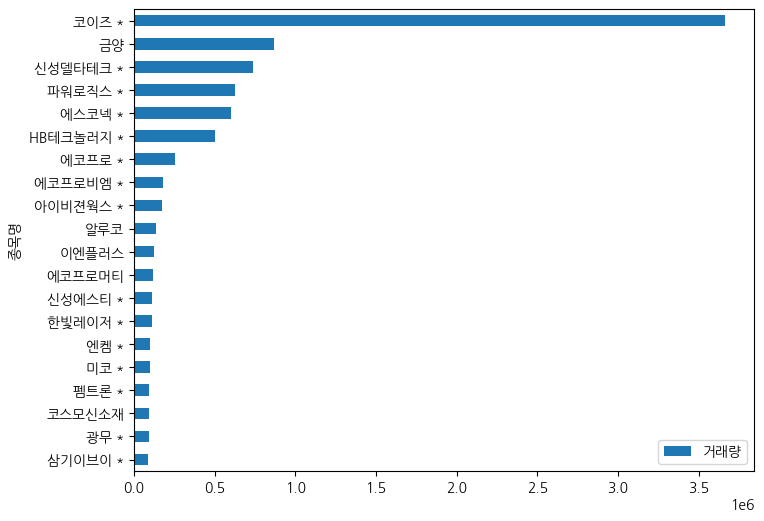

In [32]:
# 특정 테마주 종목별 거래량 상위 20종목 바 차트를 이용해 시각화
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명').plot(kind='barh', figsize=(8,6))

#### 종목명별 거래량 오름차순

In [ ]:
# 종목명 별 거래량 오름차순
df[['종목명','거래량']].sort_values('거래량')

In [ ]:
# 종목명별 거래량 오름차순 후 상위 20개 가져오기
df[['종목명','거래량']].sort_values('거래량').tail(20)

In [ ]:
# 그 후 종목명을 인덱스로 이동하기 (차트의 x축을 설정하기 위함)
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명')

<Axes: ylabel='종목명'>

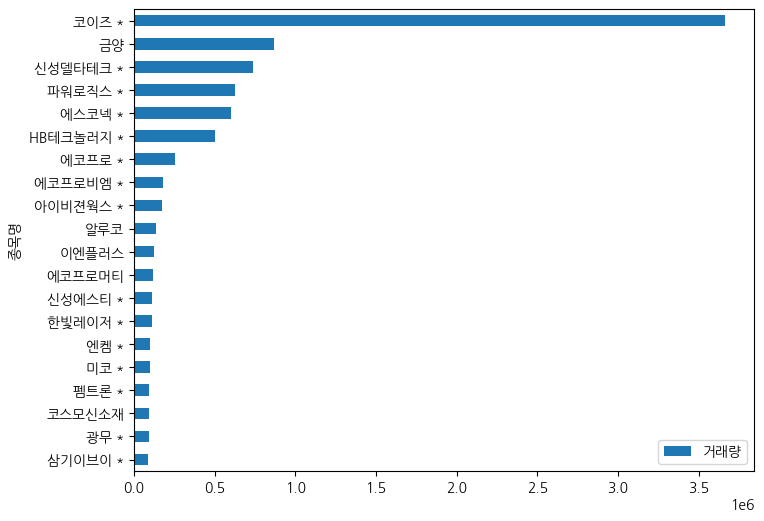

In [35]:
# barh차트 그리기
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명').plot(kind='barh', figsize=(8,6))